In [3]:
#Part 1
#Import Statements
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
#fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
#Load dataset with pandas
dataframe = pandas.read_csv('International-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
#Split into input(X) and input(Y) variables
dataset = dataset.astype("float32")

dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

95 48


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
create_dataset(dataset)

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709],
        [0.05598456],
        [0.01930502],
        [0.06949806],
        [0.07915059],
        [0.08880308],
        [0.14285713],
        [0.11389962],
        [0.13127413],
        [0.14285713],
        [0.18339768],
        [0.18339768],
        [0.15444016],
        [0.11196911],
        [0.08108109],
        [0.1196911 ],
        [0.12934363],
        [0.14671814],
        [0.17181468],
        [0.14864865],
        [0.15250966],
        [0.22007722],
        [0.24324325],
        [0.26640925],
        [0.2027027 ],
        [0

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
#Create Model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0282
Epoch 2/100
 - 0s - loss: 0.0178
Epoch 3/100
 - 0s - loss: 0.0175
Epoch 4/100
 - 0s - loss: 0.0173
Epoch 5/100
 - 0s - loss: 0.0173
Epoch 6/100
 - 0s - loss: 0.0172
Epoch 7/100
 - 0s - loss: 0.0170
Epoch 8/100
 - 0s - loss: 0.0169
Epoch 9/100
 - 0s - loss: 0.0168
Epoch 10/100
 - 0s - loss: 0.0166
Epoch 11/100
 - 0s - loss: 0.0165
Epoch 12/100
 - 0s - loss: 0.0164
Epoch 13/100
 - 0s - loss: 0.0163
Epoch 14/100
 - 0s - loss: 0.0159
Epoch 15/100
 - 0s - loss: 0.0160
Epoch 16/100
 - 0s - loss: 0.0160
Epoch 17/100
 - 0s - loss: 0.0158
Epoch 18/100
 - 0s - loss: 0.0157
Epoch 19/100
 - 0s - loss: 0.0155
Epoch 20/100
 - 0s - loss: 0.0154
Epoch 21/100
 - 0s - loss: 0.0151
Epoch 22/100
 - 0s - loss: 0.0151
Epoch 23/100
 - 0s - loss: 0.0150
Epoch 24/100
 - 0s - loss: 0.0148
Epoch 25/100
 - 0s - loss: 0.0148
Epoch 26/100
 - 0s - loss: 0.0146
Epoch 27/100
 - 0s - loss: 0.0145
Epoch 28/100
 - 0s - loss: 0.0144
Epoch 29/100
 - 0s - loss: 0.0143
Epoch 30/100
 - 0s - lo

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 38.81 RMSE
Test Score: 114.71 RMSE


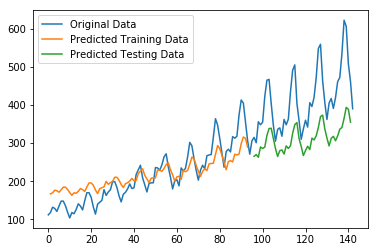

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Original Data","Predicted Training Data","Predicted Testing Data"],loc="upper left")
plt.show()


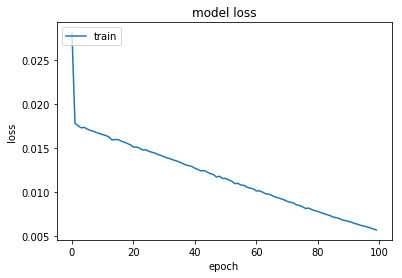

In [14]:
#Save and plot error with epochs
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

PSO Score is:  385.4232272987025
PSO Score is:  333.62318543096853
PSO Score is:  202.11847736420114
PSO Score is:  419.030230796897
PSO Score is:  358.84943164755657
PSO Score is:  212.84497918315364
PSO Score is:  416.7771369469647
PSO Score is:  756.4237351711536
PSO Score is:  146.31550175148834
PSO Score is:  130.85243303170168
PSO Score is:  514.9247293943622
PSO Score is:  92.59532474174407
PSO Score is:  135.44018563619522
PSO Score is:  553.4673716117197
PSO Score is:  420.2570388457623
PSO Score is:  88.14136936711245
PSO Score is:  236.28670897280873
PSO Score is:  409.06076934669716
PSO Score is:  564.004244201896
PSO Score is:  494.0169884953417
PSO Score is:  276.4973286032445
PSO Score is:  129.87569384772945
PSO Score is:  195.57333647854912
PSO Score is:  105.94125935157271
PSO Score is:  136.146664970902
PSO Score is:  573.9318518627457
PSO Score is:  713.2862980360851
PSO Score is:  803.6000658774916
PSO Score is:  580.5999022859236
PSO Score is:  211.0980409237368
P

PSO Score is:  220.39607039598354
PSO Score is:  171.5650764854634
PSO Score is:  408.6531190051349
PSO Score is:  94.03309346594598
PSO Score is:  218.4388018022926
PSO Score is:  275.89752548425736
PSO Score is:  627.8732439127953
PSO Score is:  312.249618642496
PSO Score is:  227.53638895356113
PSO Score is:  312.0025569527214
PSO Score is:  593.4725733831079
PSO Score is:  76.36195086418009
PSO Score is:  345.41055788294284
PSO Score is:  509.46854715001655
PSO Score is:  414.3156100792367
PSO Score is:  253.73770228137624
PSO Score is:  170.22479408123954
PSO Score is:  169.91481703624297
PSO Score is:  114.91757509207989
PSO Score is:  209.5998617068821
PSO Score is:  108.45137805876003
PSO Score is:  436.5248673183527
PSO Score is:  241.97660835265737
PSO Score is:  99.28131743148836
PSO Score is:  708.0078004023692
PSO Score is:  214.91667268717777
PSO Score is:  550.6412221244219
PSO Score is:  145.31946079431782
PSO Score is:  568.6804824744723
PSO Score is:  648.817471486228

PSO Score is:  177.15248920530593
PSO Score is:  159.90055772488807
PSO Score is:  45.83691921864165
PSO Score is:  70.28800728807774
PSO Score is:  148.41987256761695
PSO Score is:  439.1926447982207
PSO Score is:  94.02310587945097
PSO Score is:  93.41847204465199
PSO Score is:  107.47930918879138
PSO Score is:  119.11962352843284
PSO Score is:  175.66035635147125
PSO Score is:  62.00739912795406
PSO Score is:  79.16432671610178
PSO Score is:  73.01652293004796
PSO Score is:  146.01036072539807
PSO Score is:  79.56432586014667
PSO Score is:  84.12225752793287
PSO Score is:  118.09346136285635
PSO Score is:  156.5432730368156
PSO Score is:  105.48919274516436
PSO Score is:  149.2366359096061
PSO Score is:  77.9561923108347
PSO Score is:  108.27635707382908
PSO Score is:  83.22334792321578
PSO Score is:  124.20704906032174
PSO Score is:  91.46055072206305
PSO Score is:  83.8822848748038
PSO Score is:  80.70720143075995
PSO Score is:  154.0870803444779
PSO Score is:  100.06656613144418


PSO Score is:  63.95083294501168
PSO Score is:  92.94078712978337
PSO Score is:  54.851594229217454
PSO Score is:  94.56690646794394
PSO Score is:  46.981019454078194
PSO Score is:  109.02183711650002
PSO Score is:  68.8184423561634
PSO Score is:  67.04007451349032
PSO Score is:  111.66689208445291
PSO Score is:  59.54372247448754
PSO Score is:  96.43097309516085
PSO Score is:  60.080715471262195
PSO Score is:  76.48250757239074
PSO Score is:  61.08358255523245
PSO Score is:  75.9205350216794
PSO Score is:  173.27187169405184
PSO Score is:  75.61827269478178
PSO Score is:  110.91345469076143
PSO Score is:  143.61141348170983
PSO Score is:  56.63516320698867
PSO Score is:  64.14240732800549
PSO Score is:  81.84103246052183
PSO Score is:  75.33845784648398
PSO Score is:  110.75089467409083
PSO Score is:  64.19197673000079
PSO Score is:  96.0700986465019
PSO Score is:  45.61927819155888
PSO Score is:  74.81167792443817
PSO Score is:  68.22420709124657
PSO Score is:  49.893574324166714
PSO

PSO Score is:  53.95951688850175
PSO Score is:  37.17992258747406
PSO Score is:  43.20697418458868
PSO Score is:  41.72801891740868
PSO Score is:  37.06265445147082
PSO Score is:  42.28208876992623
PSO Score is:  40.21910421537813
PSO Score is:  33.32041257048976
PSO Score is:  40.9699649428764
PSO Score is:  36.66511451904512
PSO Score is:  43.62308512907893
PSO Score is:  42.64727761496569
PSO Score is:  31.78043466452361
PSO Score is:  31.612355052634424
PSO Score is:  39.18627103662457
PSO Score is:  31.812845789583868
PSO Score is:  41.52695937602782
PSO Score is:  52.97427394121405
PSO Score is:  35.05887799725101
PSO Score is:  33.614646525557404
PSO Score is:  49.16223605653211
PSO Score is:  35.24843041587604
PSO Score is:  40.72057048326542
PSO Score is:  35.982674140169806
PSO Score is:  49.075340233735005
PSO Score is:  46.966317730026205
PSO Score is:  39.49037317322799
PSO Score is:  44.39666758187917
PSO Score is:  40.77504524863896
PSO Score is:  34.03408275095575
PSO S

PSO Score is:  41.10350383124748
PSO Score is:  31.2336690004217
PSO Score is:  46.504376722409695
PSO Score is:  38.317339411813805
PSO Score is:  35.150225180575795
PSO Score is:  30.78818996467053
PSO Score is:  32.33812529652915
PSO Score is:  30.960177413401738
PSO Score is:  31.401044059783324
PSO Score is:  229.84036471442374
PSO Score is:  30.51902985841638
PSO Score is:  30.378578821292052
PSO Score is:  30.53380907978624
PSO Score is:  32.73974661716177
PSO Score is:  33.62323925732653
PSO Score is:  30.67383697990277
PSO Score is:  32.33441321012886
PSO Score is:  30.501629832733528
PSO Score is:  95.5567150962295
PSO Score is:  30.88016804451361
PSO Score is:  31.26091979332969
PSO Score is:  31.630494963744155
PSO Score is:  35.22516646253177
PSO Score is:  38.33970316421323
PSO Score is:  36.12134800711433
PSO Score is:  31.231985339398854
PSO Score is:  30.87662212263234
PSO Score is:  35.958216599038906
PSO Score is:  30.66335094197869
PSO Score is:  30.742373073024602


PSO Score is:  29.949311606928212
PSO Score is:  30.22887582571626
PSO Score is:  29.95980625985794
PSO Score is:  32.33918453215412
PSO Score is:  29.928349052055445
PSO Score is:  30.288031941295202
PSO Score is:  30.738506484893485
PSO Score is:  29.95736267853888
PSO Score is:  30.113411689295976
PSO Score is:  30.117856991569667
PSO Score is:  30.350486062521455
PSO Score is:  29.940674237395328
PSO Score is:  29.998839178932762
PSO Score is:  31.281024103931593
PSO Score is:  30.220458592133554
PSO Score is:  29.99760608154203
PSO Score is:  30.14103676011579
PSO Score is:  30.018270494626883
PSO Score is:  30.896043396933266
PSO Score is:  30.05929829075943
PSO Score is:  30.10437436275634
PSO Score is:  32.00288906174032
PSO Score is:  30.22529756913916
PSO Score is:  29.97734866331617
PSO Score is:  30.21269367907948
PSO Score is:  30.579532377212885
PSO Score is:  30.208665751613395
PSO Score is:  30.156021940495236
PSO Score is:  32.46573393418115
PSO Score is:  30.517242501

PSO Score is:  29.877787165030604
PSO Score is:  29.910594663239003
PSO Score is:  29.830987498916635
PSO Score is:  104.73019574760872
PSO Score is:  29.97791300959013
PSO Score is:  30.009920584339802
PSO Score is:  29.851007483362146
PSO Score is:  29.972364064966797
PSO Score is:  29.866807577123925
PSO Score is:  29.962358843064962
PSO Score is:  29.956831171747375
PSO Score is:  29.965970117698134
PSO Score is:  29.904141748004747
PSO Score is:  29.849772625202743
PSO Score is:  29.904438872340307
PSO Score is:  30.41879126016302
PSO Score is:  29.850315735276748
PSO Score is:  31.49161510365139
PSO Score is:  29.936601929553337
PSO Score is:  29.860890294331284
PSO Score is:  29.86151239926965
PSO Score is:  29.878926929331115
PSO Score is:  29.83163758308522
PSO Score is:  29.8422519868475
PSO Score is:  30.17798202535043
PSO Score is:  29.893999740623165
PSO Score is:  29.840086190315866
PSO Score is:  30.46739058061838
PSO Score is:  29.87047470192139
PSO Score is:  29.864737

PSO Score is:  29.888243626135072
PSO Score is:  29.83034178002125
PSO Score is:  29.835166070861
PSO Score is:  29.820213152866177
PSO Score is:  29.837652094190382
PSO Score is:  29.824448659422
PSO Score is:  29.859607789871966
PSO Score is:  29.825710517876736
PSO Score is:  29.900474419513216
PSO Score is:  29.81927943544774
PSO Score is:  29.820559358552657
PSO Score is:  29.820699427318864
PSO Score is:  29.840201962611765
PSO Score is:  29.91379630899049
PSO Score is:  29.850260114543445
PSO Score is:  29.816743286441643
PSO Score is:  29.933889456247254
PSO Score is:  29.84139612756981
PSO Score is:  29.930298832524173
PSO Score is:  29.81081084870001
PSO Score is:  29.857648661348797
PSO Score is:  29.81440419587525
PSO Score is:  29.816289370207144
PSO Score is:  29.813389226534653
PSO Score is:  29.87131692601396
PSO Score is:  29.808835681811573
PSO Score is:  29.82877323908589
PSO Score is:  29.820166760845545
PSO Score is:  29.884224842687722
PSO Score is:  29.8809762552

PSO Score is:  29.80061161075465
PSO Score is:  29.82881129166267
PSO Score is:  29.804203368237804
PSO Score is:  29.80458028241702
PSO Score is:  29.811448202194434
PSO Score is:  29.8159653923066
PSO Score is:  29.802780880750944
PSO Score is:  29.803102537913958
PSO Score is:  29.799980164114764
PSO Score is:  29.816058980747354
PSO Score is:  29.801860818130216
PSO Score is:  29.815691008435763
PSO Score is:  29.81281425991936
PSO Score is:  29.80846421236673
PSO Score is:  29.79960409291619
PSO Score is:  29.803493392826375
PSO Score is:  29.79673166069405
PSO Score is:  29.79944013173469
PSO Score is:  29.806074389886994
PSO Score is:  29.80486306345751
PSO Score is:  29.80574954791406
PSO Score is:  29.821603827686104
PSO Score is:  29.802134698305522
PSO Score is:  29.817520109742944
PSO Score is:  29.80343640949204
PSO Score is:  29.812949444868103
PSO Score is:  29.806309152184
PSO Score is:  29.800775772272004
PSO Score is:  29.80843460336968
PSO Score is:  29.8063341724492

PSO Score is:  29.800461619337568
PSO Score is:  29.789954954768184
PSO Score is:  29.806930479716282
PSO Score is:  29.791144663542113
PSO Score is:  29.79216274562689
PSO Score is:  29.789335404273075
PSO Score is:  29.80333979206809
PSO Score is:  29.807451131653497
PSO Score is:  29.799561241979674
PSO Score is:  29.793240821527103
PSO Score is:  29.791149209178528
PSO Score is:  29.79001151703187
PSO Score is:  29.793378690907062
PSO Score is:  29.803994845131093
PSO Score is:  29.799498112297822
PSO Score is:  29.792343807897566
PSO Score is:  29.79708257536322
PSO Score is:  29.791521446360747
PSO Score is:  29.801598910604753
PSO Score is:  29.80034499795584
PSO Score is:  29.796559930764996
PSO Score is:  29.798724001241915
PSO Score is:  29.79007025668892
PSO Score is:  29.792741313967106
PSO Score is:  29.791213922819743
PSO Score is:  29.797697805994687
PSO Score is:  29.79619906643451
PSO Score is:  29.800284574562347
PSO Score is:  29.79737818372808
PSO Score is:  29.7917

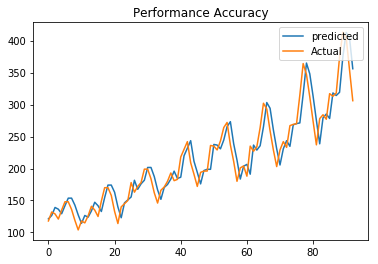

In [17]:
#Part 2 Pyswarm
#Import necessary packages
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
import numpy as np
from pyswarm import pso
#from pyswarm.utils.search import RandomSearch
#from pyswarm.utils.functions import single_obj as fx
from keras.models import Sequential







plt.plot(results)
plt.title("Performance Accuracy")
plt.legend(["predicted","Actual"],loc="upper right")


In [ ]:
#Set up model
model2 = Sequential()
model2.add(LSTM(4, input_shape=(1, look_back)))
model2.add(Dense(1))

In [ ]:
#Set up function f to pass into pso
def f(x):
    w1 = x[0:16].reshape(1,16) #Set up parameters
    c1 = x[16:80].reshape(4,16)
    w2 = x[80:96]
    c2 = x[96:100].reshape(4, 1)
    c3 = x[100].reshape(1,)
    
    model2.layers[0].set_weights([np.array(w1),np.array(c1),np.array(w2)]) #Set weights for layer 1
    model2.layers[1].set_weights([np.array(c2),np.array(c3)]) #Set weights for layer2
    
    trainpredict2 = model2.predict(trainX) #Predict model based on trainingX data
    trainpredict2 = scaler.inverse_transform(trainpredict2) #Shape predictiondata
    testpredict2 = model2.predict(testX) #Predict model based on testX data
    testpredict2 = scaler.inverse_transform(testpredict2) 

    
    trainscore2 = math.sqrt(mean_squared_error(trainY[0],trainpredict2[:,0])) #Train score like we did with LSTM
    testscore2 = math.sqrt(mean_squared_error(testY[0],testpredict2[:,0])) 
    
    pso_score = (trainscore2*.7)+(testscore2*.3)
    print("PSO Score is: ", pso_score)
    return(pso_score)

In [ ]:
#Set bounds
lb = 110*[-1]
ub = 110*[1]

In [ ]:
#Call pso function
xopt, fopt = pso(f,lb,ub,minstep=.02)



In [ ]:
#Get Graphing Information
trainpredict2 = model2.predict(trainX)
trainpredict2 = scaler.inverse_transform(trainpredict2)

results = np.transpose([trainpredict2[:,0],trainY[0]])